In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banglore-city-traffic-dataset/Banglore_traffic_Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
data = pd.read_csv('/kaggle/input/banglore-city-traffic-dataset/Banglore_traffic_Dataset.csv', encoding = 'unicode_escape')

In [4]:
data.shape

(8936, 16)

In [5]:
data.head(5)

Date    Area Name Road/Intersection Name  Traffic Volume  \
0  2022-01-01  Indiranagar          100 Feet Road           50590   
1  2022-01-01  Indiranagar               CMH Road           30825   
2  2022-01-01   Whitefield    Marathahalli Bridge            7399   
3  2022-01-01  Koramangala    Sony World Junction           60874   
4  2022-01-01  Koramangala          Sarjapur Road           57292   

   Average Speed  Travel Time Index  Congestion Level  \
0      50.230299           1.500000        100.000000   
1      29.377125           1.500000        100.000000   
2      54.474398           1.039069         28.347994   
3      43.817610           1.500000        100.000000   
4      41.116763           1.500000        100.000000   

   Road Capacity Utilization  Incident Reports  Environmental Impact  \
0                 100.000000                 0               151.180   
1                 100.000000                 1               111.650   
2                  36.396525                 0                64.798   
3                 100.000000                 1               171.748   
4                 100.000000                 3               164.584   

   Public Transport Usage  Traffic Signal Compliance  Parking Usage  \
0               70.632330                  84.044600      85.403629   
1               41.924899                  91.407038      59.983689   
2               44.662384                  61.375541      95.466020   
3               32.773123                  75.547092      63.567452   
4               35.092601                  64.634762      93.155171   

   Pedestrian and Cyclist Count Weather Conditions  \
0                           111              Clear   
1                           100              Clear   
2                           189              Clear   
3                           111              Clear   
4                           104              Clear   

  Roadwork and Construction Activity  
0                                 No  
1                                 No  
2                                 No  
3                                 No  
4                                 No

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [7]:
# Descriptive Statistics
data.describe().T

count          mean           std          min  \
Traffic Volume                8936.0  29236.048120  13001.808801  4233.000000   
Average Speed                 8936.0     39.447427     10.707244    20.000000   
Travel Time Index             8936.0      1.375554      0.165319     1.000039   
Congestion Level              8936.0     80.818041     23.533182     5.160279   
Road Capacity Utilization     8936.0     92.029215     16.583341    18.739771   
Incident Reports              8936.0      1.570389      1.420047     0.000000   
Environmental Impact          8936.0    108.472096     26.003618    58.466000   
Public Transport Usage        8936.0     45.086651     20.208460    10.006853   
Traffic Signal Compliance     8936.0     79.950243     11.585006    60.003933   
Parking Usage                 8936.0     75.155597     14.409394    50.020411   
Pedestrian and Cyclist Count  8936.0    114.533348     36.812573    66.000000   

                                       25%           50%           75%  \
Traffic Volume                19413.000000  27600.000000  38058.500000   
Average Speed                    31.775825     39.199368     46.644517   
Travel Time Index                 1.242459      1.500000      1.500000   
Congestion Level                 64.292905     92.389018    100.000000   
Road Capacity Utilization        97.354990    100.000000    100.000000   
Incident Reports                  0.000000      1.000000      2.000000   
Environmental Impact             88.826000    105.200000    126.117000   
Public Transport Usage           27.341191     45.170684     62.426485   
Traffic Signal Compliance        69.828270     79.992773     89.957358   
Parking Usage                    62.545895     75.317610     87.518589   
Pedestrian and Cyclist Count     94.000000    102.000000    111.000000   

                                       max  
Traffic Volume                72039.000000  
Average Speed                    89.790843  
Travel Time Index                 1.500000  
Congestion Level                100.000000  
Road Capacity Utilization       100.000000  
Incident Reports                 10.000000  
Environmental Impact            194.078000  
Public Transport Usage           79.979744  
Traffic Signal Compliance        99.993652  
Parking Usage                    99.995049  
Pedestrian and Cyclist Count    243.000000

# EDA

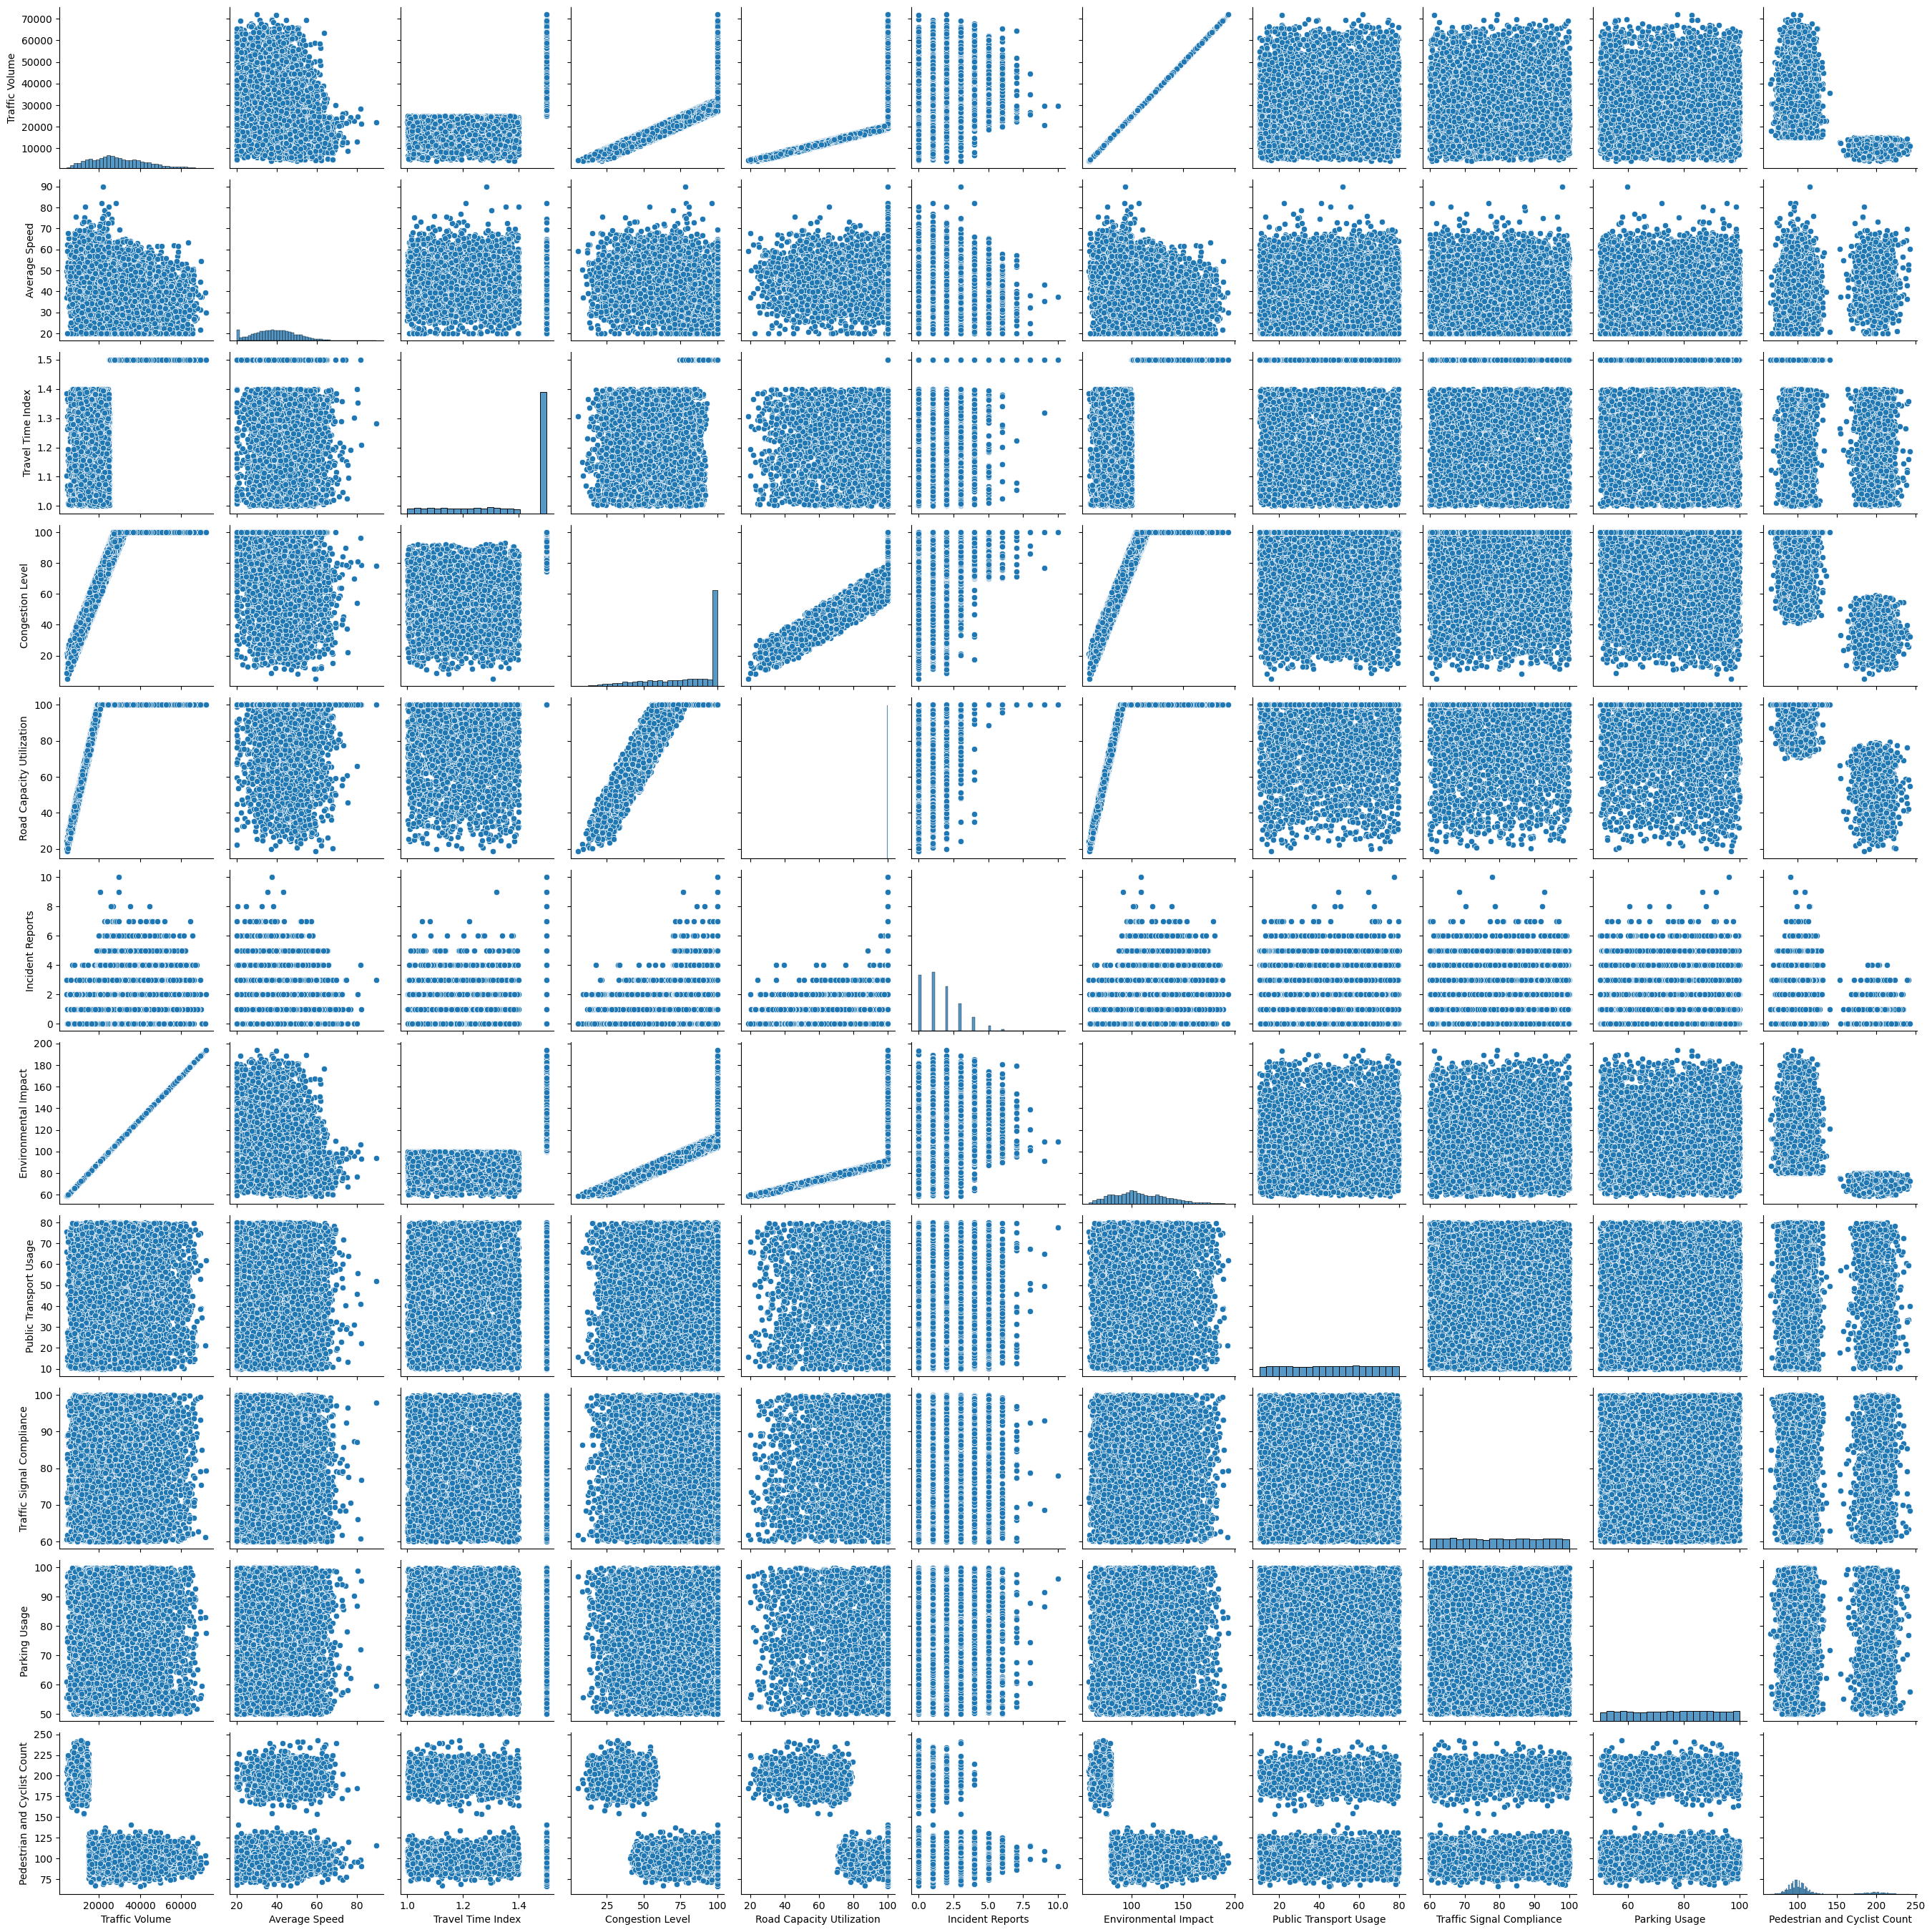

In [8]:
# To visualize the Pairplot of data
sns.pairplot(data)

In [9]:
# Object columns
data.describe(include = "object")

Date    Area Name Road/Intersection Name Weather Conditions  \
count         8936         8936                   8936               8936   
unique         952            8                     16                  5   
top     2023-01-24  Indiranagar          100 Feet Road              Clear   
freq            15         1720                    860               5426   

       Roadwork and Construction Activity  
count                                8936  
unique                                  2  
top                                    No  
freq                                 8054

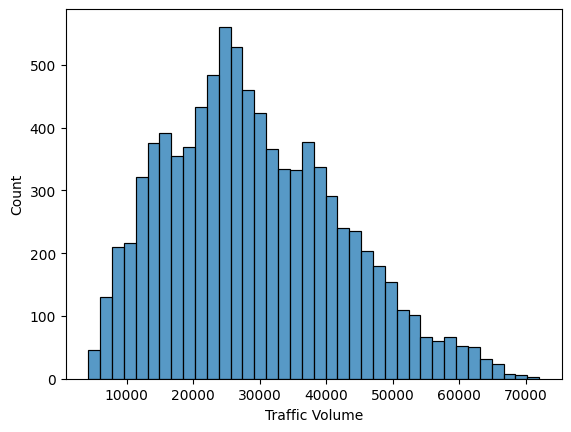

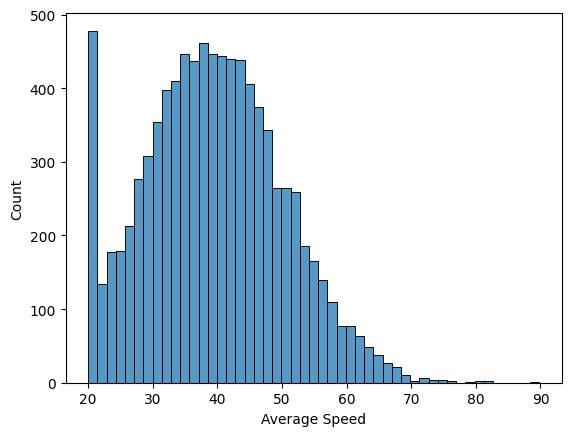

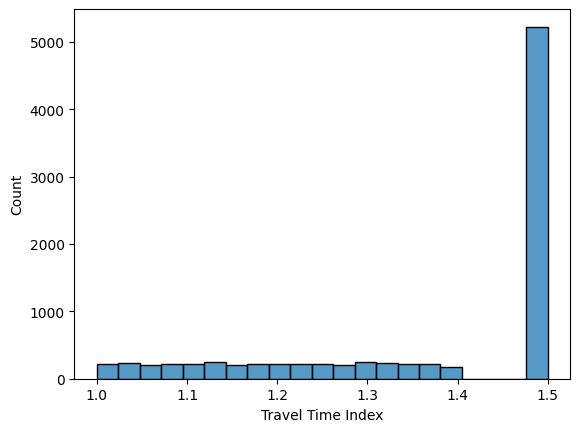

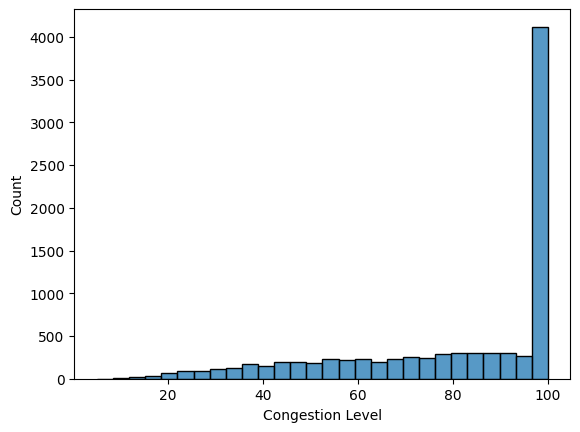

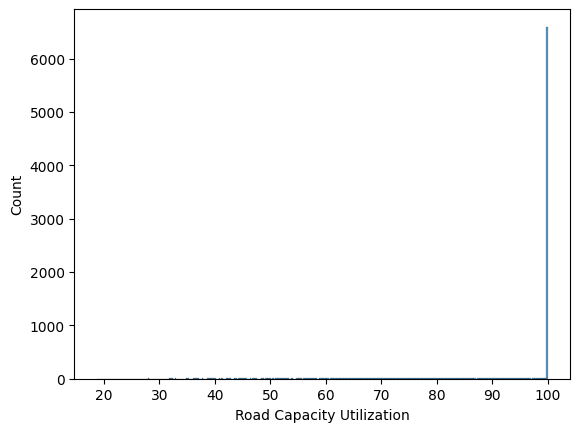

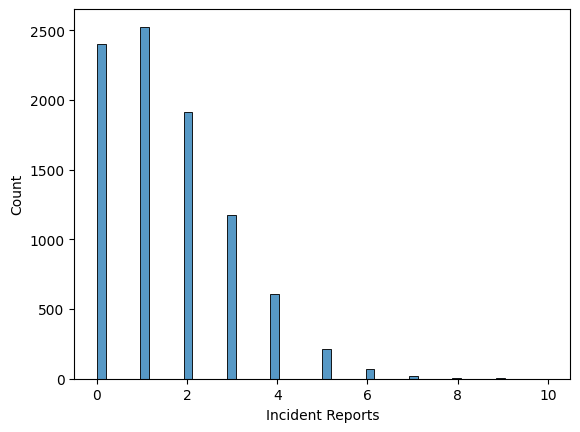

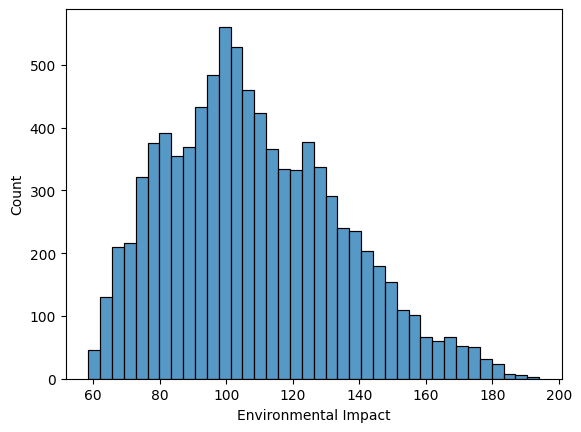

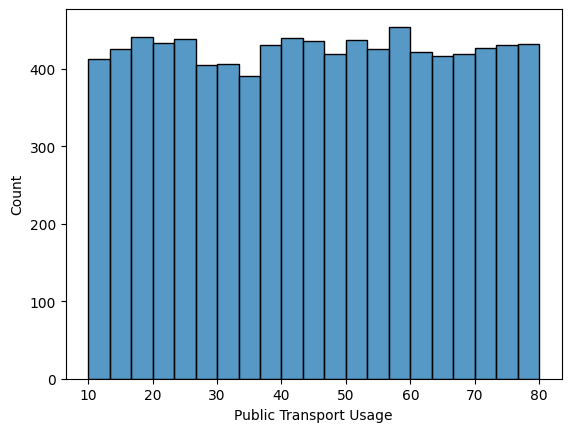

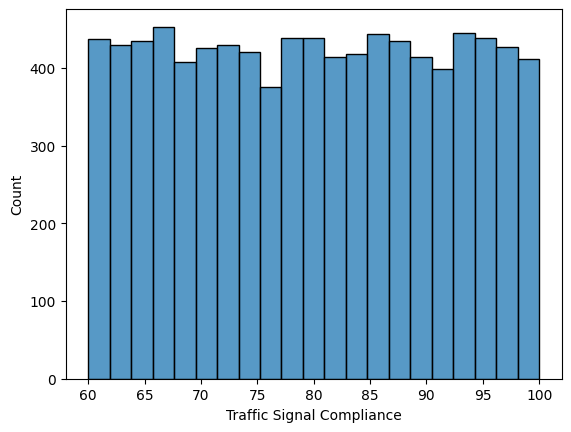

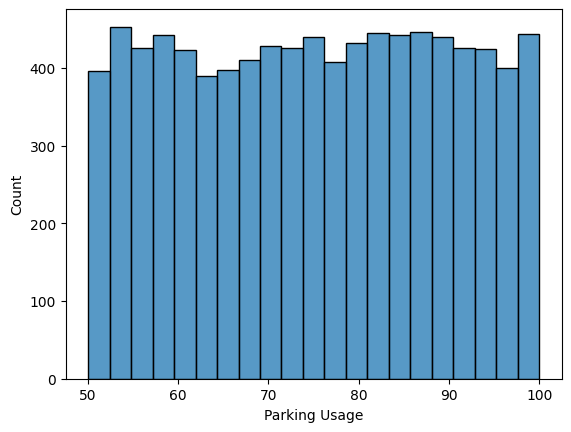

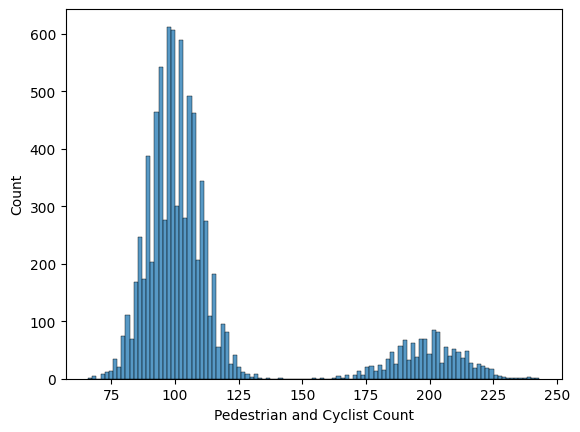

In [10]:
# Histogram to understand the Distribution 
for i in data.select_dtypes(include = "number").columns:
    sns.histplot(data = data, x = i)
    plt.show()

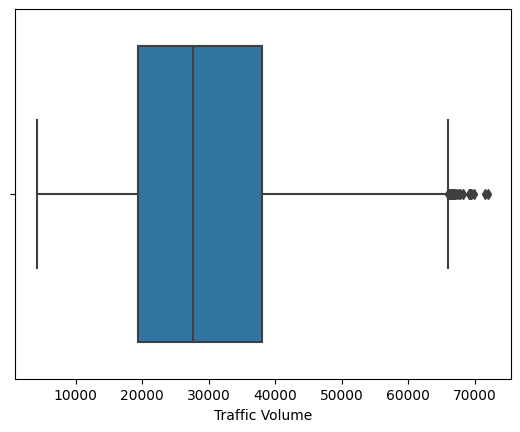

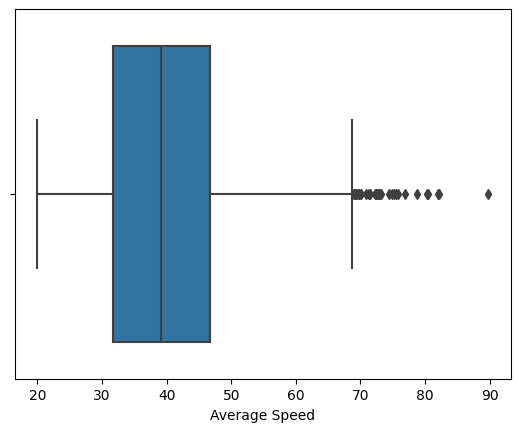

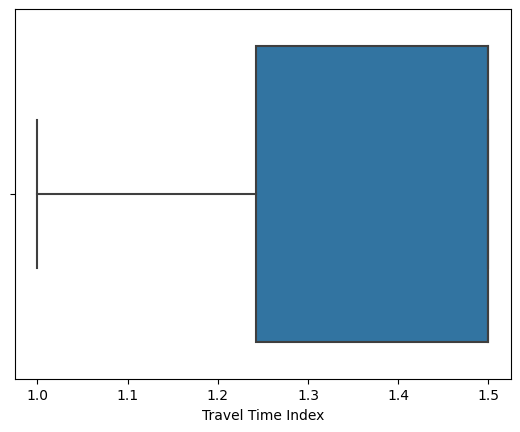

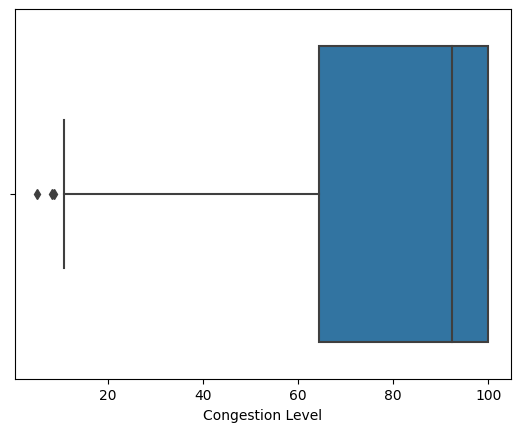

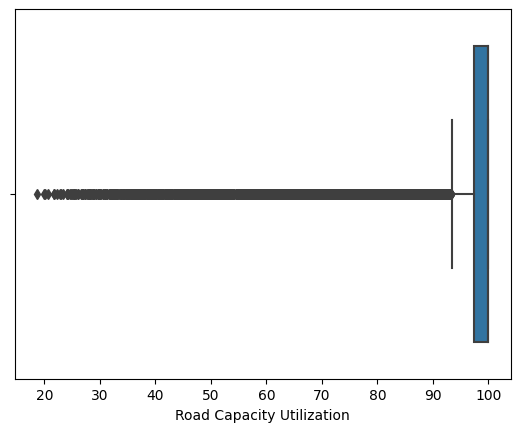

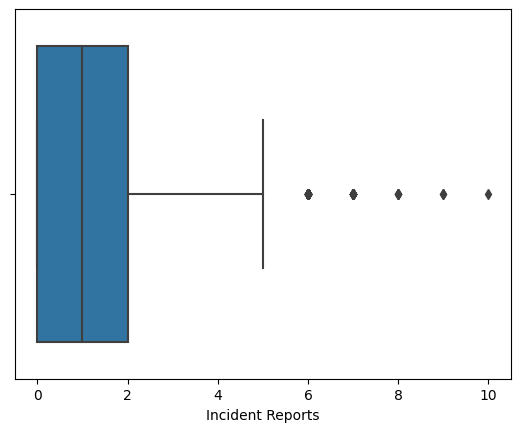

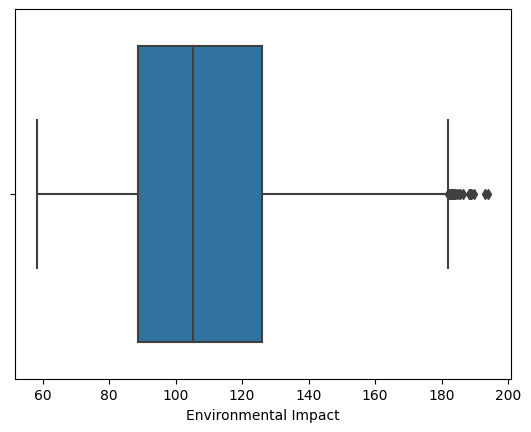

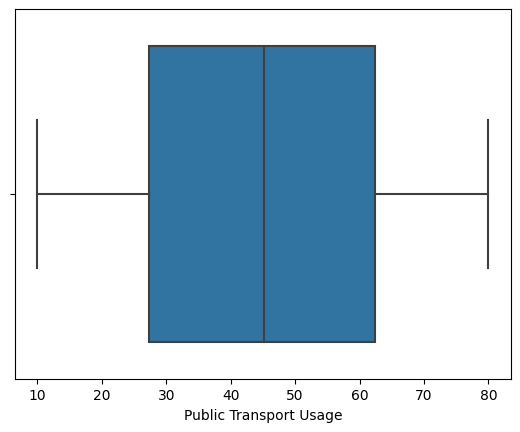

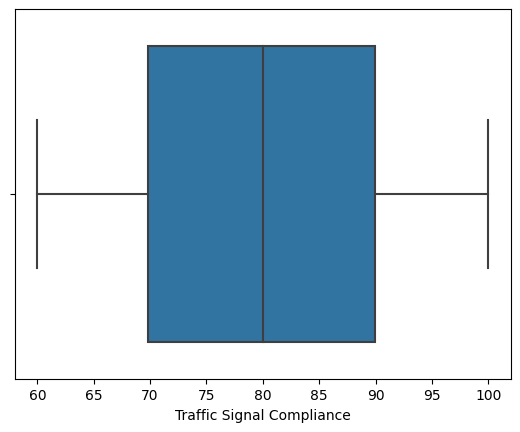

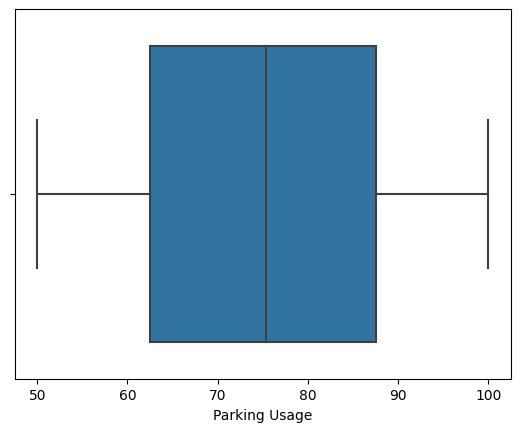

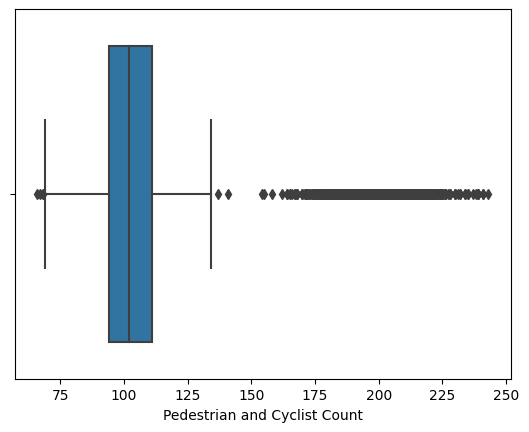

In [11]:
# Boxplot to identify outliers
for i in data.select_dtypes(include = "number").columns:
    sns.boxplot(data = data, x = i)
    plt.show()

<Axes: >

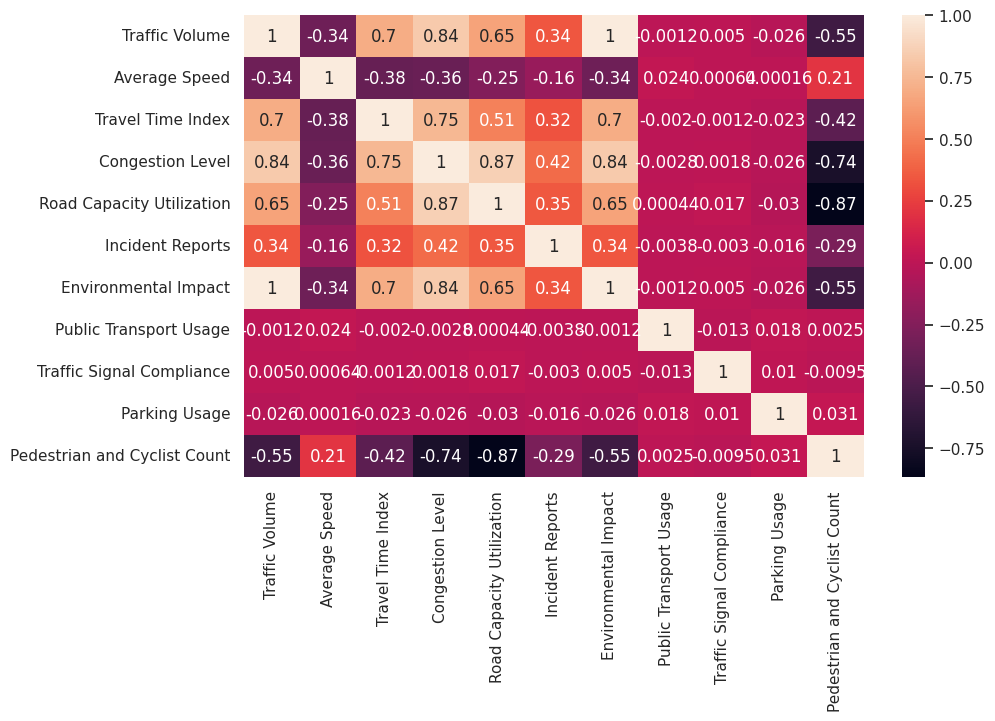

In [12]:
# Correlation with heatmap to interpret the relation and multicollinearity
sns.set(rc = {'figure.figsize': (10,6)})
s = data.select_dtypes(include = "number").corr()
sns.heatmap(s, annot = True)

# Categorical Columns Distribution

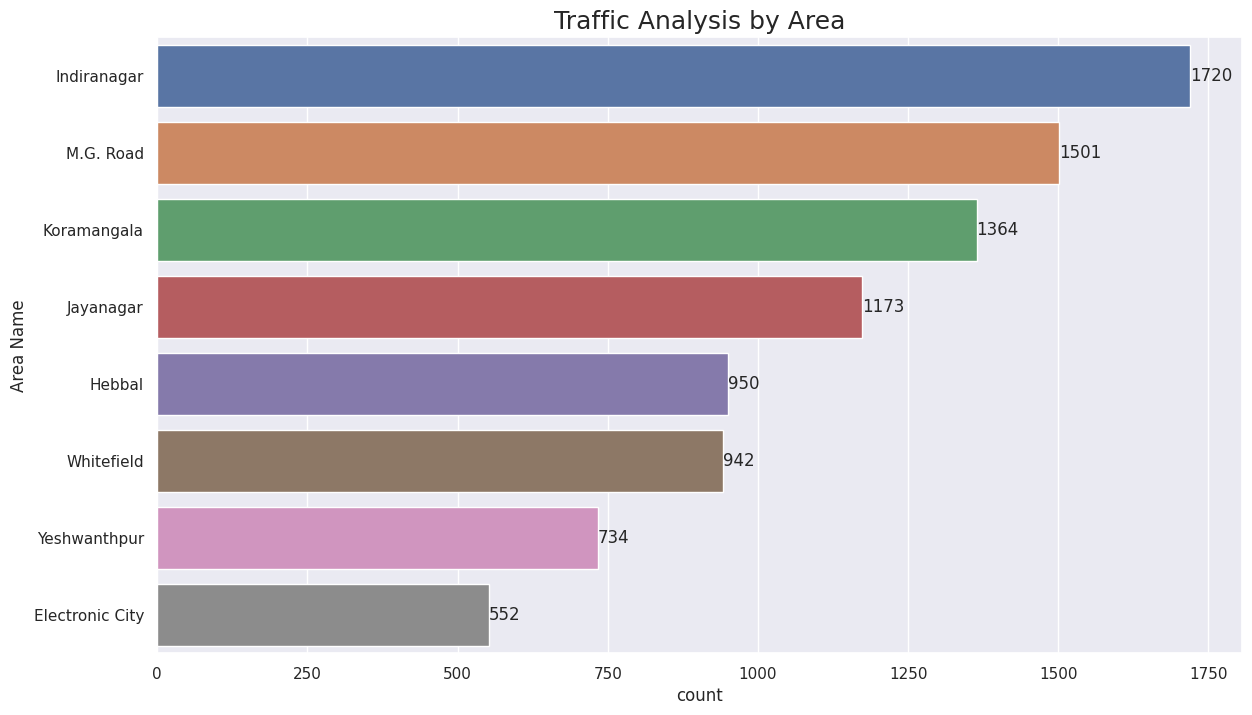

In [13]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(y='Area Name', data=data, order=data['Area Name'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Traffic Analysis by Area', fontsize = 18)
plt.show()

# Traffic Volume vs Average Speed

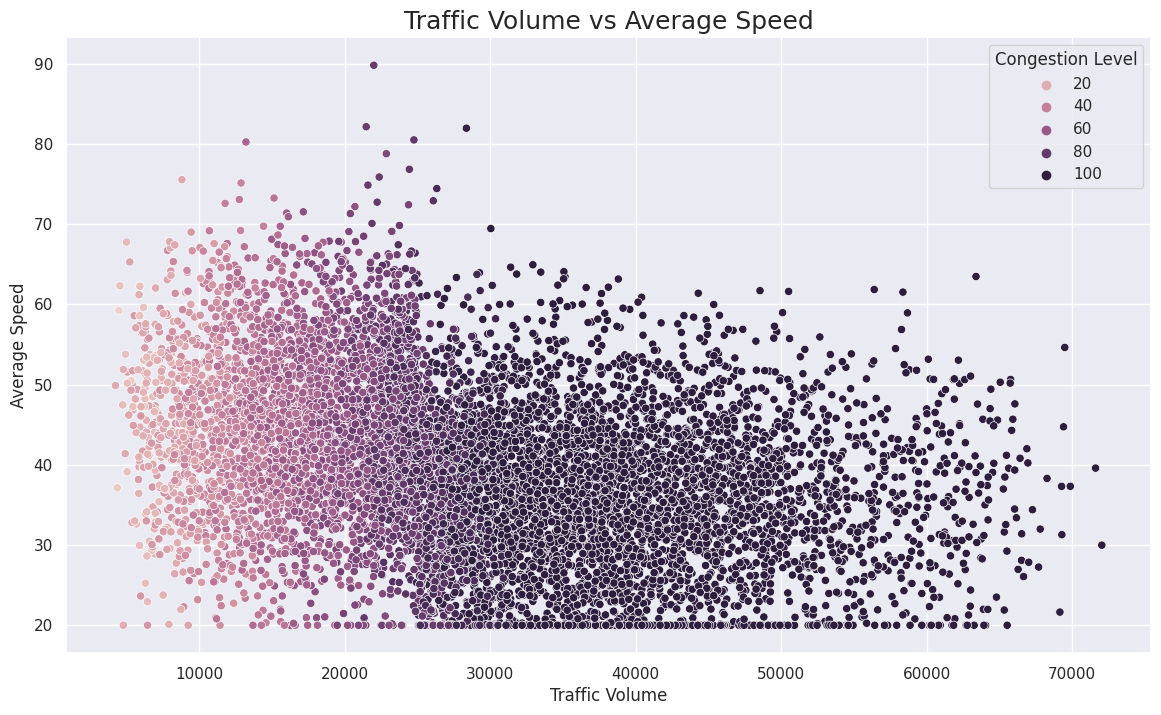

In [14]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x = 'Traffic Volume', y = 'Average Speed', hue = 'Congestion Level', data = data)
plt.title('Traffic Volume vs Average Speed', fontsize = 18)
plt.show()

# Time Series Analysis

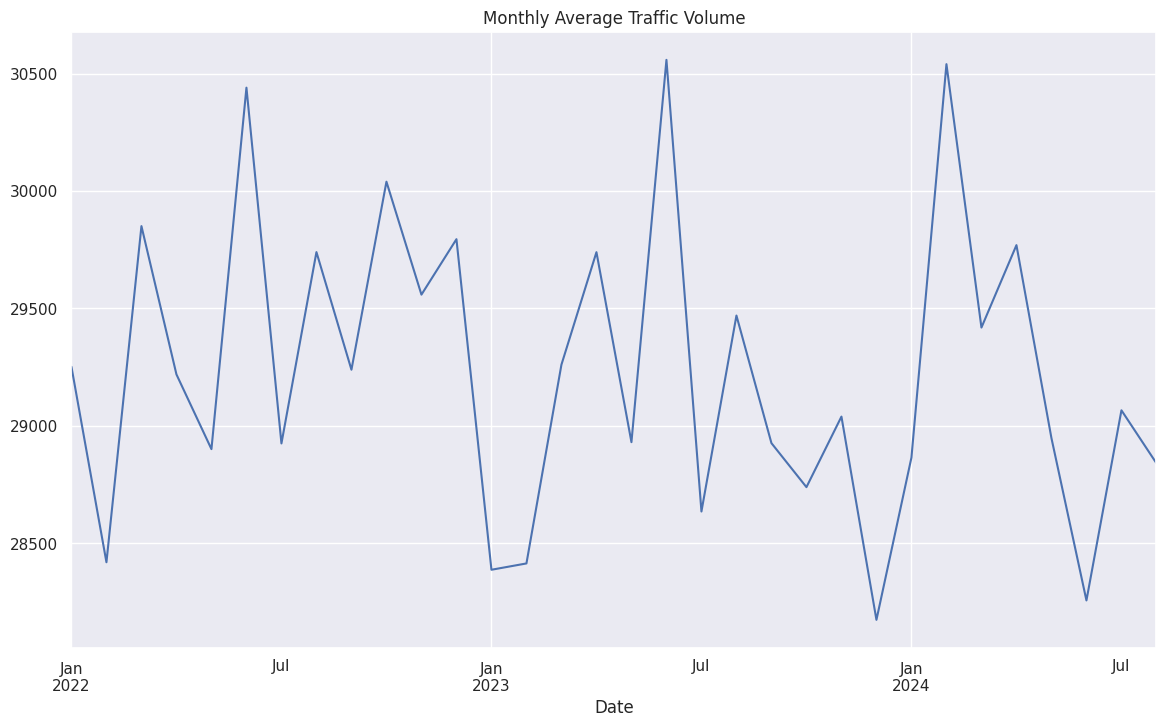

In [15]:

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Traffic Volume'].resample('M').mean().plot(figsize=(14, 8))
plt.title('Monthly Average Traffic Volume')
plt.show()


# Congestion Level vs Time of Day

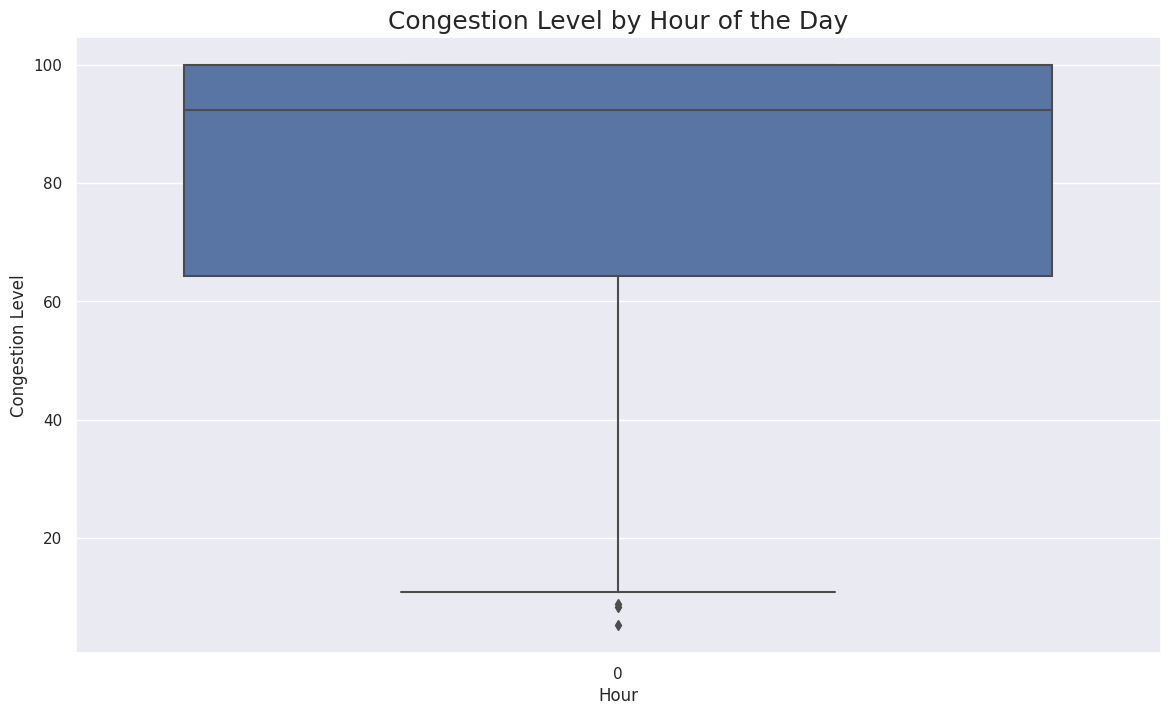

In [16]:
data['Hour'] = data.index.hour
plt.figure(figsize=(14, 8))
sns.boxplot(x='Hour', y='Congestion Level', data = data)
plt.title('Congestion Level by Hour of the Day', fontsize = 18)
plt.show()

# Impact of Environmental Conditions on Traffic

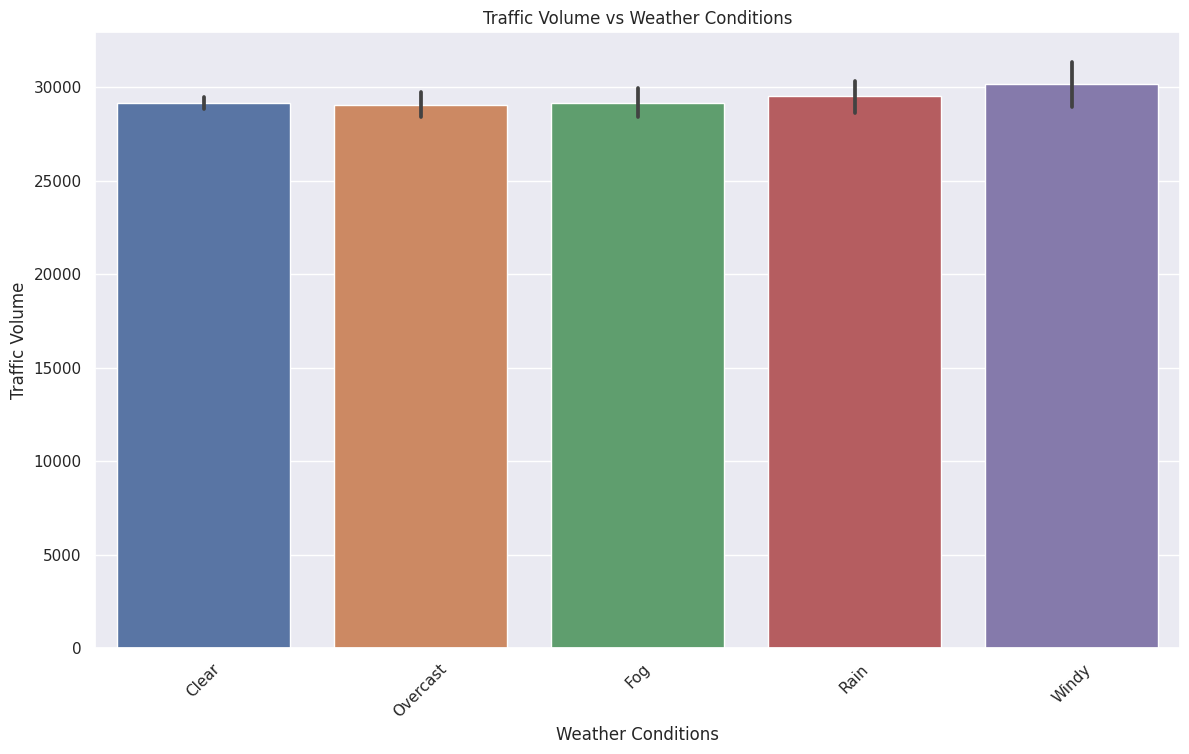

In [17]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Weather Conditions', y='Traffic Volume', data=data)
plt.title('Traffic Volume vs Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Incident Reports Analysis

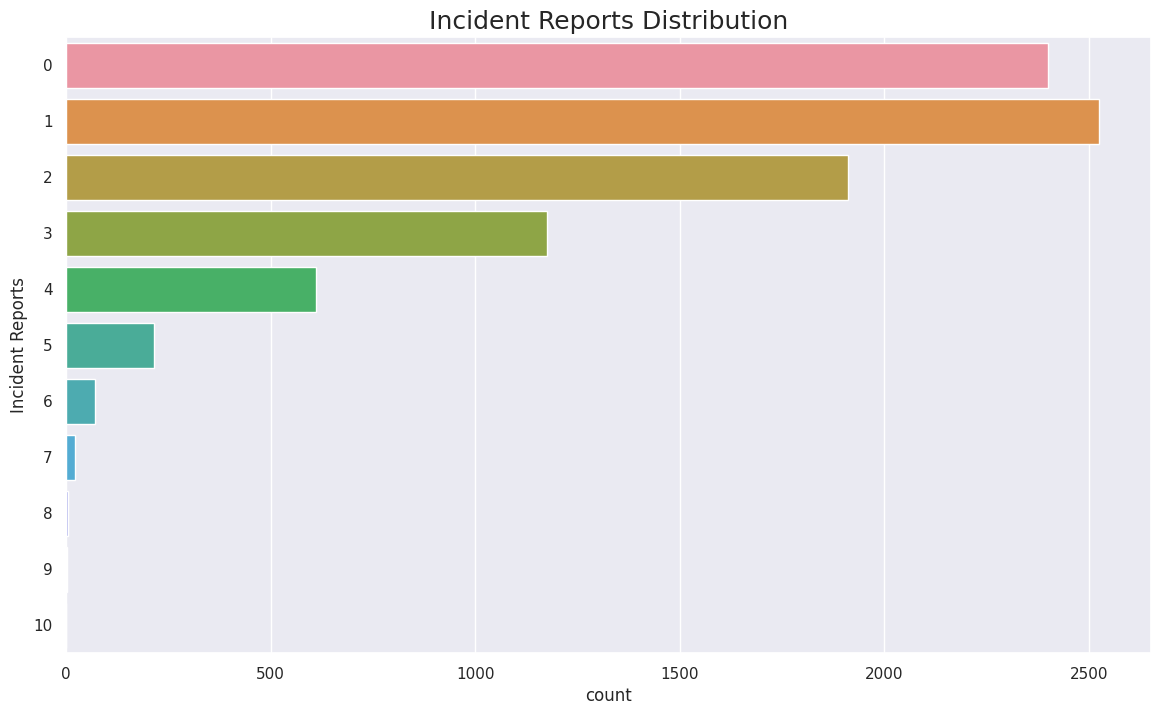

In [18]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Incident Reports', data=data)
plt.title('Incident Reports Distribution', fontsize = 18)
plt.show()

# Roadwork and Construction Activity Impact

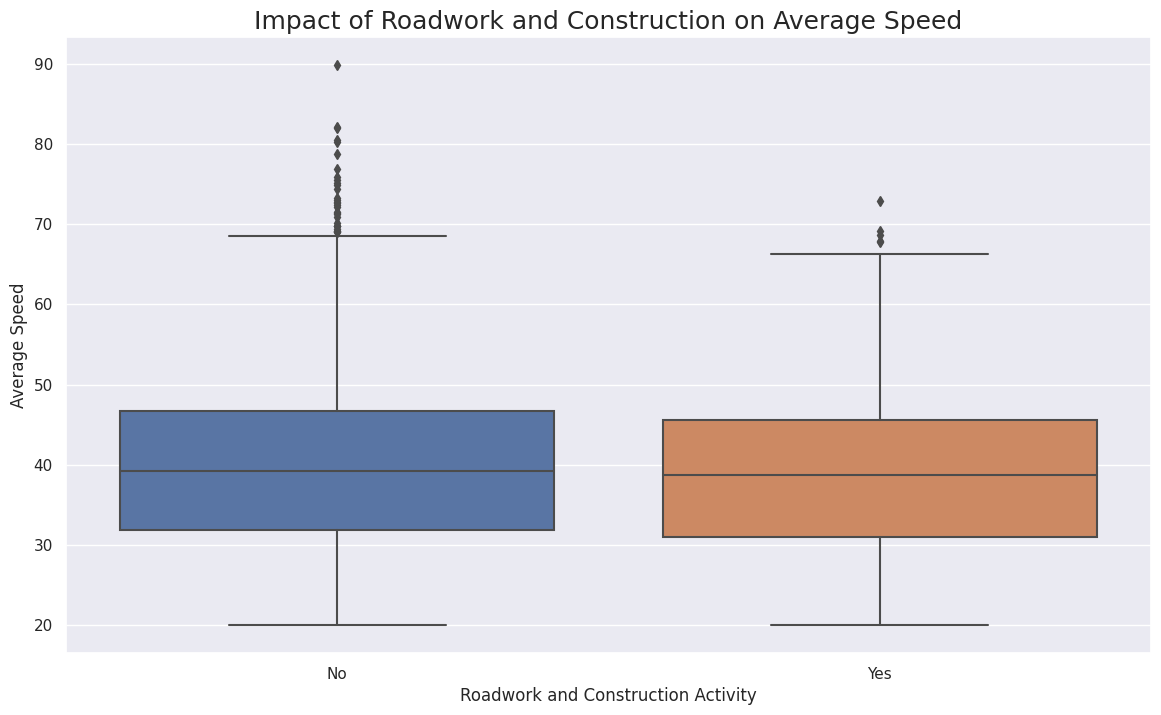

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Roadwork and Construction Activity', y='Average Speed', data=data)
plt.title('Impact of Roadwork and Construction on Average Speed', fontsize = 18)
plt.show()

# Public Transport Usage Analysis

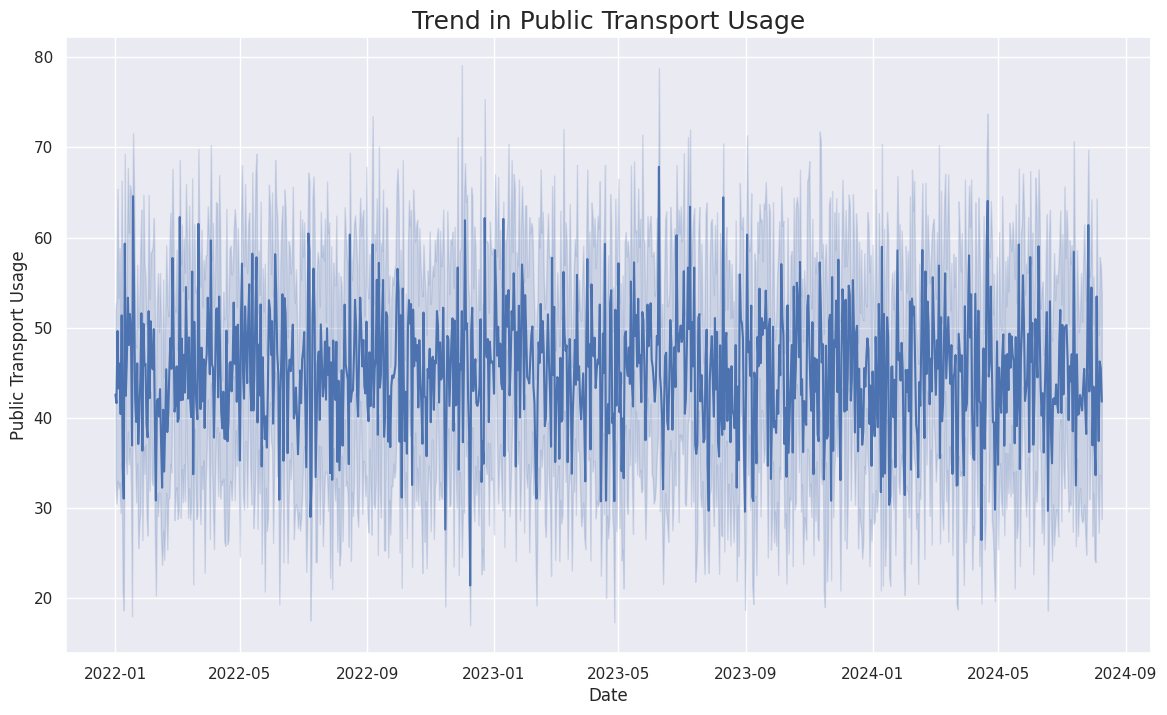

In [20]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Public Transport Usage', data=data)
plt.title('Trend in Public Transport Usage', fontsize = 18)
plt.show()

# Traffic Signal Compliance Analysis

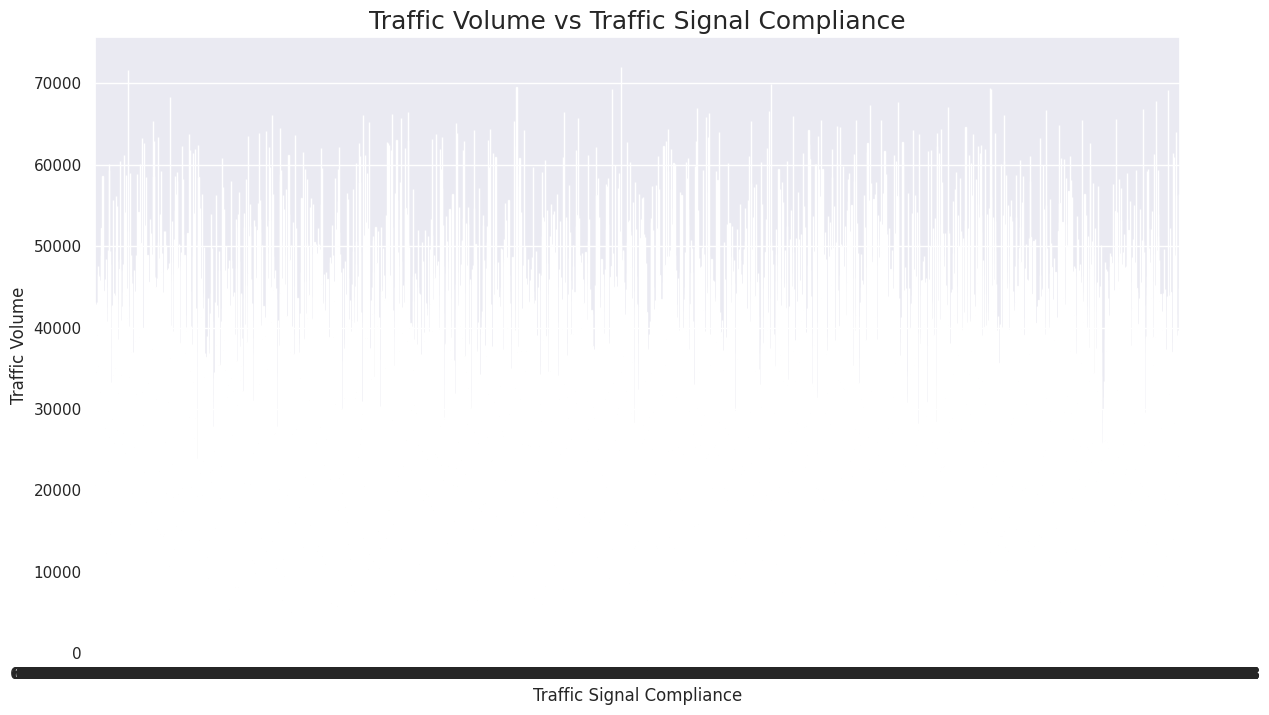

In [21]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Traffic Signal Compliance', y='Traffic Volume', data=data)
plt.title('Traffic Volume vs Traffic Signal Compliance', fontsize = 18)
plt.show()